# Tisch MS Insights Challenge - Team Brussels Sprouts

# Objective:  To analyze immunoglobulin (Ig) sequences and B-cell subtypes derived from the cerebrospinal fluid (CSF) of multiple sclerosis (MS) patients and identify potential patterns in allele usage, Ig subtypes, genetic editing and sequence diversity.  

In [2]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#your info here
__author__ = "Ankit Zutshi"
__email__ = "azutshi@deloitte.com"

Read in the IG sequence and OCB datasets

In [3]:
IG = pd.read_excel('Ig Sequences.xlsx', sheetname='Sheet1')

Some EDA on IG data

In [4]:
IG.shape

(3814, 25)

In [5]:
IG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 25 columns):
Sample                        3814 non-null object
Cell                          3814 non-null object
H Sequence ID                 2341 non-null object
H V-GENE and allele           2343 non-null object
H V-DOMAIN Functionality      2343 non-null object
H V-REGION score              2343 non-null object
H V-REGION identity % (nt)    2343 non-null object
H J-GENE and allele           2343 non-null object
H J-REGION score              2343 non-null object
H J-REGION identity % (nt)    2343 non-null object
H D-GENE and allele           2342 non-null object
H D-REGION reading frame      2342 non-null object
H CDR-IMGT lengths            2343 non-null object
H AA JUNCTION                 2343 non-null object
IgG/IgM/IgA                   2313 non-null object
L Sequence ID                 2304 non-null object
L V-GENE and allele           2303 non-null object
L V-DOMAIN Functionality  

In [6]:
IG.head()

,Sample,Cell,H Sequence ID,H V-GENE and allele,H V-DOMAIN Functionality,H V-REGION score,H V-REGION identity % (nt),H J-GENE and allele,H J-REGION score,H J-REGION identity % (nt),...,L Sequence ID,L V-GENE and allele,L V-DOMAIN Functionality,L V-REGION score,L V-REGION identity % (nt),L J-GENE and allele,L J-REGION score,L J-REGION identity % (nt),L CDR-IMGT lengths,L AA JUNCTION
0,A1577,A1577c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1577,A1577c2,A1577_H2-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",productive,1300,94.79% (273/288 nt),"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,82.35% (42/51 nt),...,A1577L2-1,"Homsap IGLV2-23*01 F, or Homsap IGLV2-23*02 F ...",productive,1118.0,91.35% (243/266 nt),"Homsap IGLJ2*01 F, or Homsap IGLJ3*01 F",163,92.11% (35/38 nt),[9.3.11],CSSFRSDVRGVLF
2,A1577,A1577c3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A1577L3-2,Homsap IGKV1-17*01 F,productive,1291.0,96.06% (268/279 nt),Homsap IGKJ1*01 F,180,100.00% (36/36 nt),[6.3.9],CLQHISYPRTF
3,A1577,A1577c4,A1577_H4-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",Productive,1300,94.79% (273/288 nt),"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,82.35% (42/51 nt),...,A1577L4-1,"Homsap IGLV2-23*01 F, or Homsap IGLV2-23*02 F ...",productive,1282.0,94.10% (271/288 nt),"Homsap IGLJ2*01 F, or Homsap IGLJ3*01 F",163,92.11% (35/38 nt),[9.3.11],CSSFRSDVRGVLF
4,A1577,A1577c5,A1577_H5-1,Homsap IGHV3-48*02 F,Productive,1342,97.52% (275/282 nt) [97.16% (274/282 nt)],Homsap IGHJ4*02 F,222,95.83% (46/48 nt),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check count of nulls or duplicates

In [7]:
IG.duplicated().sum()

0

In [8]:
IG.isnull().sum()

Sample                           0
Cell                             0
H Sequence ID                 1473
H V-GENE and allele           1471
H V-DOMAIN Functionality      1471
H V-REGION score              1471
H V-REGION identity % (nt)    1471
H J-GENE and allele           1471
H J-REGION score              1471
H J-REGION identity % (nt)    1471
H D-GENE and allele           1472
H D-REGION reading frame      1472
H CDR-IMGT lengths            1471
H AA JUNCTION                 1471
IgG/IgM/IgA                   1501
L Sequence ID                 1510
L V-GENE and allele           1511
L V-DOMAIN Functionality      1511
L V-REGION score              1511
L V-REGION identity % (nt)    1511
L J-GENE and allele           1511
L J-REGION score              1511
L J-REGION identity % (nt)    1511
L CDR-IMGT lengths            1511
L AA JUNCTION                 1514
dtype: int64

In [9]:
OCB = pd.read_excel('OCBs and Expanded Clones.xlsx', sheetname='Sheet1')

In [10]:
OCB.shape

(243, 18)

In [11]:
OCB.head()

,Code,Date of Sample Collection,Date of OCB Results,Medics Code,Name,Sex,Age (at tap),Disease Type,EDSS,Date of Dx,Treatment at time of tap,Number of Lymphocytes,CD19+ CD138-,CD19+ CD138+,CD19- CD138+,OCB +/-,OCB Number,Notes and Desc.
0,C1709,2008-02-05,NaN,2507.0,"Paravalos, Loiza",Female,51.0,Control,NaN,1998,NaN,2927.0,13.0,1.0,7.0,-,NaN,NaN
1,E4872,2013-11-21,NaN,28892.0,"Hoagland, Sylvia",Female,67.0,SPMS,7.0,1978,"ITMTX, Rituxan",NaN,NaN,NaN,NaN,-,Oligoclonal bands absent,NaN
2,E4877,2013-11-25,NaN,29927.0,"Zelman, Marissa",Female,54.0,PPMS,2.0,2013,None,NaN,NaN,NaN,NaN,-,NaN,No oligoclonal bands were identified in this ...
3,E4982,2014-01-31,NaN,20974.0,"Stecker, Marc",Male,51.0,PPMS,7.0,2000,None,1974.0,3.0,0.0,1.0,-,NaN,"As compared to the serum, isoelectric focusin..."
4,B5229,2014-06-10,NaN,30040.0,"Alster, Karen",Female,60.0,PPMS,1.5,2009,None,3283.0,15.0,0.0,4.0,-,NaN,Normal CSF isoelectric focusing pattern


Check nulls or duplicates

In [12]:
OCB.duplicated().sum()

0

In [13]:
OCB.isnull().sum()

Code                           0
Date of Sample Collection      0
Date of OCB Results          195
Medics Code                    1
Name                          41
Sex                            0
Age (at tap)                   1
Disease Type                   7
EDSS                          66
Date of Dx                    55
Treatment at time of tap      59
Number of Lymphocytes         12
CD19+ CD138-                  12
CD19+ CD138+                  12
CD19- CD138+                  12
OCB +/-                       55
OCB Number                   199
Notes and Desc.              193
dtype: int64

In [14]:
OCB.Sex.value_counts()

Female    153
Male       90
Name: Sex, dtype: int64

Combine the 2 datasets for our analysis

In [15]:
MS_Data = pd.merge(IG, OCB, how='left', left_on='Sample', right_on = 'Code')

In [16]:
MS_Data.head()

,Sample,Cell,H Sequence ID,H V-GENE and allele,H V-DOMAIN Functionality,H V-REGION score,H V-REGION identity % (nt),H J-GENE and allele,H J-REGION score,H J-REGION identity % (nt),...,EDSS,Date of Dx,Treatment at time of tap,Number of Lymphocytes,CD19+ CD138-,CD19+ CD138+,CD19- CD138+,OCB +/-,OCB Number,Notes and Desc.
0,A1577,A1577c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1988,NaN,1701.0,10.0,9.0,3.0,+,11,"As compared to the serum, isoelectric focusin..."
1,A1577,A1577c2,A1577_H2-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",productive,1300,94.79% (273/288 nt),"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,82.35% (42/51 nt),...,NaN,1988,NaN,1701.0,10.0,9.0,3.0,+,11,"As compared to the serum, isoelectric focusin..."
2,A1577,A1577c3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1988,NaN,1701.0,10.0,9.0,3.0,+,11,"As compared to the serum, isoelectric focusin..."
3,A1577,A1577c4,A1577_H4-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",Productive,1300,94.79% (273/288 nt),"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,82.35% (42/51 nt),...,NaN,1988,NaN,1701.0,10.0,9.0,3.0,+,11,"As compared to the serum, isoelectric focusin..."
4,A1577,A1577c5,A1577_H5-1,Homsap IGHV3-48*02 F,Productive,1342,97.52% (275/282 nt) [97.16% (274/282 nt)],Homsap IGHJ4*02 F,222,95.83% (46/48 nt),...,NaN,1988,NaN,1701.0,10.0,9.0,3.0,+,11,"As compared to the serum, isoelectric focusin..."


In [17]:
MS_Data.duplicated().sum()

0

In [18]:
MS_Data.isnull().sum()

Sample                           0
Cell                             0
H Sequence ID                 1473
H V-GENE and allele           1471
H V-DOMAIN Functionality      1471
H V-REGION score              1471
H V-REGION identity % (nt)    1471
H J-GENE and allele           1471
H J-REGION score              1471
H J-REGION identity % (nt)    1471
H D-GENE and allele           1472
H D-REGION reading frame      1472
H CDR-IMGT lengths            1471
H AA JUNCTION                 1471
IgG/IgM/IgA                   1501
L Sequence ID                 1510
L V-GENE and allele           1511
L V-DOMAIN Functionality      1511
L V-REGION score              1511
L V-REGION identity % (nt)    1511
L J-GENE and allele           1511
L J-REGION score              1511
L J-REGION identity % (nt)    1511
L CDR-IMGT lengths            1511
L AA JUNCTION                 1514
Code                             0
Date of Sample Collection        0
Date of OCB Results           2947
Medics Code         

In [19]:
MS_Data.shape

(3814, 43)

In [20]:
MS_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3813
Data columns (total 43 columns):
Sample                        3814 non-null object
Cell                          3814 non-null object
H Sequence ID                 2341 non-null object
H V-GENE and allele           2343 non-null object
H V-DOMAIN Functionality      2343 non-null object
H V-REGION score              2343 non-null object
H V-REGION identity % (nt)    2343 non-null object
H J-GENE and allele           2343 non-null object
H J-REGION score              2343 non-null object
H J-REGION identity % (nt)    2343 non-null object
H D-GENE and allele           2342 non-null object
H D-REGION reading frame      2342 non-null object
H CDR-IMGT lengths            2343 non-null object
H AA JUNCTION                 2343 non-null object
IgG/IgM/IgA                   2313 non-null object
L Sequence ID                 2304 non-null object
L V-GENE and allele           2303 non-null object
L V-DOMAIN Functionality  

In [21]:
MS_Data.describe(include=[np.number])

,L V-REGION score,Medics Code,Age (at tap),EDSS,Number of Lymphocytes,CD19+ CD138-,CD19+ CD138+,CD19- CD138+
count,2303.000000,3780.000000,3780.000000,2787.000000,3610.000000,3610.000000,3610.000000,3610.000000
mean,1294.145897,26367.744709,45.179894,3.803373,15326.797507,275.593075,109.496122,29.585319
std,104.372547,8386.034401,13.291226,2.849966,17329.868882,605.399095,241.919820,43.956855
min,190.000000,130.000000,14.000000,0.000000,188.000000,0.000000,0.000000,0.000000
25%,1255.000000,28608.000000,36.000000,0.500000,4321.000000,29.000000,4.000000,6.000000
50%,1303.000000,29608.000000,45.000000,4.000000,8893.000000,76.000000,28.000000,13.000000
75%,1354.000000,30351.000000,54.000000,6.500000,20021.000000,204.000000,82.000000,29.000000
max,1498.000000,31075.000000,81.000000,9.000000,98390.000000,3956.000000,1470.000000,222.000000


In [22]:
MS_Data.describe(include=['O'])

,Sample,Cell,H Sequence ID,H V-GENE and allele,H V-DOMAIN Functionality,H V-REGION score,H V-REGION identity % (nt),H J-GENE and allele,H J-REGION score,H J-REGION identity % (nt),...,Code,Date of OCB Results,Name,Sex,Disease Type,Date of Dx,Treatment at time of tap,OCB +/-,OCB Number,Notes and Desc.
count,3814,3814,2341,2343,2343,2343,2343,2343,2343,2343,...,3814,867,3805,3814,3725,2878,2711,3305,801,903
unique,200,3814,2340,300,8,195,308,61,113,142,...,200,42,183,2,25,39,22,5,17,38
top,E6042,E5692c1,E6042H27-1,Homsap IGHV3-23*04 F,productive,1291,94.44% (272/288 nt),Homsap IGHJ4*02 F,204,91.67% (44/48 nt),...,E6042,DIFFERENT 1/6/2015,"Fitzgerald, John",Female,PPMS,2010,None,Not done,>5,""">5 well defined gamma restriction bands that ..."
freq,96,1,2,147,2227,82,82,990,165,165,...,96,96,115,1996,1162,301,1622,1438,348,96


In [23]:
MS_Data['Disease Type'].value_counts()

PPMS                                       1162
SPMS                                       1113
RRMS                                       1003
Control                                     153
No dx                                        72
No Dx                                        31
SPMS (early)                                 28
PPMS vs SPMS                                 26
Not MS, possible Sjogren's                   24
SPMS, Sjogren's, Rheumatoid Arthritis        23
ALS                                          20
Sarcoid                                      15
Lymphoma                                     11
HTLV-1                                        8
SPMS vs Sjogren's                             7
Myelitis                                      6
Nonspecific white matter disease              4
Sjogren's                                     4
No Dx, suspected not MS                       4
Sarcoidosis                                   3
Transverse myelitis                     

Preprocessing 1.1: Remove non-MS patients data

In [24]:
MS_Data = MS_Data[(~MS_Data['Disease Type'].str.startswith('Not MS', na=False)) & ~MS_Data['Disease Type'].isnull()]

In [25]:
MS_Data.shape

(3701, 43)

Preprocessing 1.2: Removing Unproductive H-V/L-V DOMAIN Functionality from the analysis

In [26]:
MS_Data['H V-DOMAIN Functionality'].value_counts()

productive                              2168
unproductive (stop codons)                60
Productive                                30
unproductive                              13
-                                          3
no rearrangement found (stop codons)       3
no rearrangement found                     2
Unproductive (stop codons)                 2
Name: H V-DOMAIN Functionality, dtype: int64

In [27]:
MS_Data['L V-DOMAIN Functionality'].value_counts()

productive                                       2061
unproductive (stop codons)                         77
unproductive                                       51
Productive                                         31
no rearrangement found                              6
Unproductive (stop codons)                          6
no rearrangement found (stop codons)                4
productive (a)                                      1
unproductive (stop codons, no junction found)       1
Name: L V-DOMAIN Functionality, dtype: int64

In [28]:
MS_Data = MS_Data[MS_Data['H V-DOMAIN Functionality'].str.lower().str.startswith('productive',na=False) & MS_Data['L V-DOMAIN Functionality'].str.lower().str.startswith('productive',na=False)]

In [29]:
MS_Data['H V-DOMAIN Functionality'] = MS_Data['H V-DOMAIN Functionality'].str.upper()

In [30]:
MS_Data['L V-DOMAIN Functionality'] = MS_Data['L V-DOMAIN Functionality'].str.upper()

In [31]:
MS_Data['H V-DOMAIN Functionality'].value_counts()

PRODUCTIVE    1645
Name: H V-DOMAIN Functionality, dtype: int64

In [32]:
MS_Data['L V-DOMAIN Functionality'].value_counts()

PRODUCTIVE        1644
PRODUCTIVE (A)       1
Name: L V-DOMAIN Functionality, dtype: int64

In [33]:
MS_Data.shape

(1645, 43)

Preprocessing 1.3: Cleanup identity % for H V and LV Region Identity for use in our analysis

In [34]:
def clean_Identity_Scores(col):
    '''Only take the first pecentage (upto 2 decimals) as the actual H-V/L-V region score and convert to float'''
    MS_Data[col] = MS_Data[col].str[:5]
    MS_Data[col] = MS_Data[col].astype('float')/100.0
    #return MS_Data

In [35]:
clean_Identity_Scores('H V-REGION identity % (nt)')
clean_Identity_Scores('H J-REGION identity % (nt)')

clean_Identity_Scores('L V-REGION identity % (nt)')
clean_Identity_Scores('L J-REGION identity % (nt)')

In [36]:
MS_Data['L V-REGION identity % (nt)'].head()

1    0.9135
3    0.9410
5    0.9340
7    0.9306
8    0.9965
Name: L V-REGION identity % (nt), dtype: float64

In [37]:
MS_Data.isnull().sum()

Sample                           0
Cell                             0
H Sequence ID                    0
H V-GENE and allele              0
H V-DOMAIN Functionality         0
H V-REGION score                 0
H V-REGION identity % (nt)       0
H J-GENE and allele              0
H J-REGION score                 0
H J-REGION identity % (nt)       0
H D-GENE and allele              1
H D-REGION reading frame         1
H CDR-IMGT lengths               0
H AA JUNCTION                    0
IgG/IgM/IgA                     53
L Sequence ID                    0
L V-GENE and allele              0
L V-DOMAIN Functionality         0
L V-REGION score                 1
L V-REGION identity % (nt)       1
L J-GENE and allele              1
L J-REGION score                 1
L J-REGION identity % (nt)       1
L CDR-IMGT lengths               1
L AA JUNCTION                    4
Code                             0
Date of Sample Collection        0
Date of OCB Results           1292
Medics Code         

# Analysis 1: Our data shows that we frequently see the same light chain CDR3 from different patients, but very infrequently see the same in heavy chain CDR3s. The combinatorial diversity shows that the same light chain rearrangement will occur about 18 times more often than the same heavy chain rearrangement (6348/355). Is this increased frequency in line with expectations or is there selected light chain rearrangements in MS?

In [38]:
MS_Data['H AA JUNCTION'].nunique()  

1244

In [39]:
MS_Data['L AA JUNCTION'].nunique()

1057

In [40]:
H_AA = MS_Data.groupby('H AA JUNCTION')['Medics Code'].value_counts().reset_index(name='H_AA_Sample_Counts')

In [41]:
H_AA.head()

,H AA JUNCTION,Medics Code,H_AA_Sample_Counts
0,ADTAVYYCARPRPGARDAFDIW(c),29882.0,1
1,CAADPPWAGKTSVFDLW,30533.0,39
2,CAAEGPRDDWNYKGHFDCW,30277.0,1
3,CAAIPGTHRYGHLIDARYYYGMDVW,30882.0,1
4,CAAPELELAQGIDYW,30882.0,1


In [42]:
L_AA = MS_Data.groupby('L AA JUNCTION')['Medics Code'].value_counts().reset_index(name='L_AA_Sample_Counts')

In [43]:
L_AA.head()

,L AA JUNCTION,Medics Code,L_AA_Sample_Counts
0,CAAWDDFLNGWVF,30011.0,1
1,CAAWDDRLSGVIF,833.0,1
2,CAAWDDSLDGPVF,30351.0,1
3,CAAWDDSLKAVLF,30705.0,1
4,CAAWDDSLNGGVF,2403.0,1


In [44]:
CDR3 = pd.merge(H_AA,L_AA, on='Medics Code', how='inner')

In [45]:
CDR3.shape

(29912, 5)

In [46]:
CDR3['Medics Code'] = CDR3['Medics Code'].astype('O')

Below graph shows the frequency of the same HAA/LAA junction  where it is seen in more than 1 patients

Text(0,0.5,u'H Recombination Count')

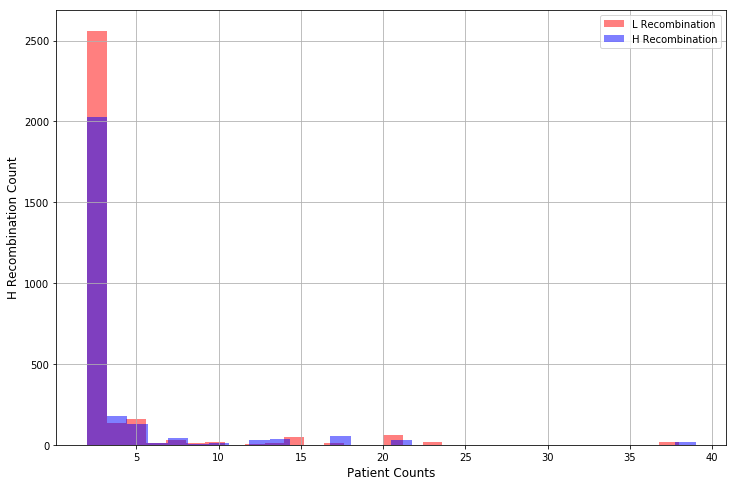

In [47]:
#sns.set_style('white')
plt.figure(figsize=(12,8))
CDR3[(CDR3['L_AA_Sample_Counts'] > 1)] ['L_AA_Sample_Counts'].hist(alpha=0.5,color='red',
                                              bins=30,label='L Recombination')
CDR3[(CDR3['H_AA_Sample_Counts'] > 1)]['H_AA_Sample_Counts'].hist(alpha=0.5,color='blue',
                                               bins=30, label='H Recombination')

#sns.countplot(CDR3['H_AA_Sample_Counts'],data=CDR3[CDR3['H_AA_Sample_Counts'] > 1])
plt.legend()
plt.xlabel('Patient Counts', size=12)
plt.ylabel('H Recombination Count', size=12
          )

Text(0,0.5,u'H Recombination Count')

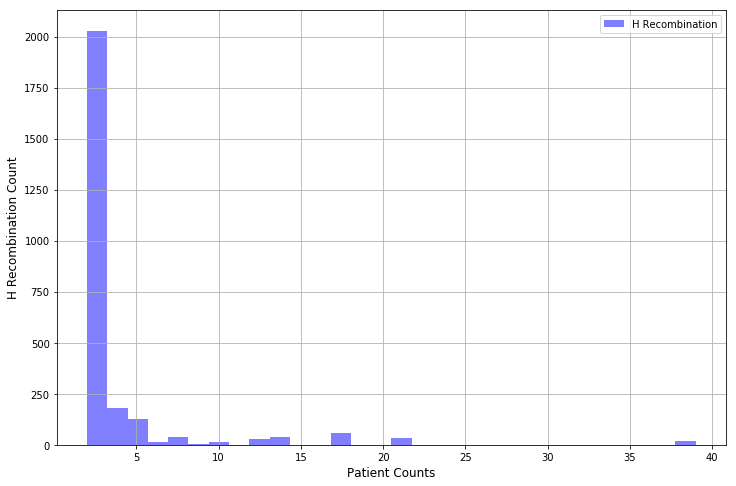

In [48]:
plt.figure(figsize=(12,8))
CDR3[(CDR3['H_AA_Sample_Counts'] > 1) ]['H_AA_Sample_Counts'].hist(alpha=0.5,color='blue',
                                               bins=30, label='H Recombination')
plt.legend()
plt.xlabel('Patient Counts', size=12)
plt.ylabel('H Recombination Count', size=12
          )


Text(0,0.5,u'L Recombination Count')

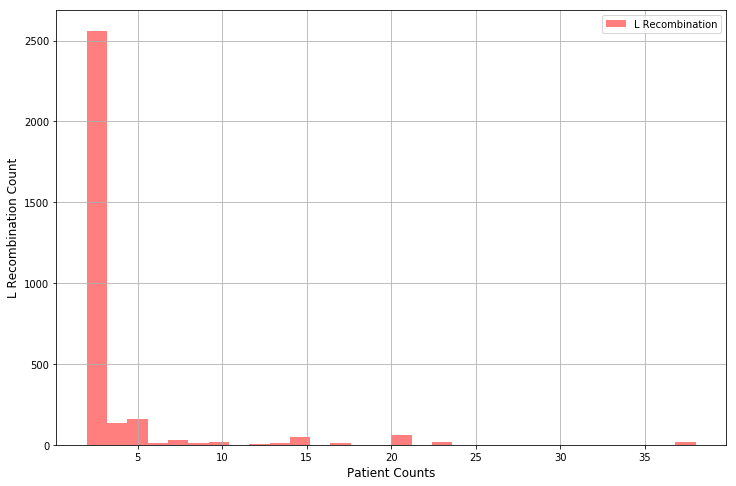

In [49]:
#sns.set_style('white')
plt.figure(figsize=(12,8))

CDR3[(CDR3['L_AA_Sample_Counts'] > 1) ] ['L_AA_Sample_Counts'].hist(alpha=0.5,color='red',
                                              bins=30,label='L Recombination')
plt.legend()
plt.xlabel('Patient Counts', size=12)
plt.ylabel('L Recombination Count', size=12
          )

Above graph and data shows a higher lightchain recombination(L AA Junction) in different patients as compared to heavychain (H AA Junction)
however the recombination ratio is not 18 times but 1.2x

In [50]:
CDR3[CDR3['H_AA_Sample_Counts'] > 1]['H_AA_Sample_Counts'].value_counts().sum()

2580L

In [51]:
CDR3[CDR3['L_AA_Sample_Counts'] > 1]['L_AA_Sample_Counts'].value_counts().sum()

3109L

# Analysis2:  VH3 is the most common and assuming random recombination, should be the most represented. However, there have been research papers claiming that the VH4 family of genes are preferentially utilized in MS. Any analysis that can support this claim or refute it would be interesting. 

Binary encoding to create Gene Type column (HV3, HV4)

In [52]:
#MS_Data['Gene_VH3'] = np.where(MS_Data['H V-GENE and allele'].str.contains('HV3'), 1, 0)

#MS_Data['Gene_VH4'] = np.where(MS_Data['H V-GENE and allele'].str.contains('HV4'), 1, 0)

#MS_Data['Gene_Type'] = np.where(MS_Data['Gene_VH3'] == 1,'VH3', MS_Data['Gene_VH4'] == 1,'VH4', 'Other')

MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV1'), ''] = 'HV1'

# MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV2'), 'HV'] = 'HV2'

MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV3'), 'HV'] = 'HV3'

MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV4'), 'HV'] = 'HV4'

MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV5'), 'HV'] = 'HV5'

MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV6'), 'HV'] = 'HV6'

MS_Data.loc[MS_Data['H V-GENE and allele'].str.contains('HV7'), 'HV'] = 'HV7'


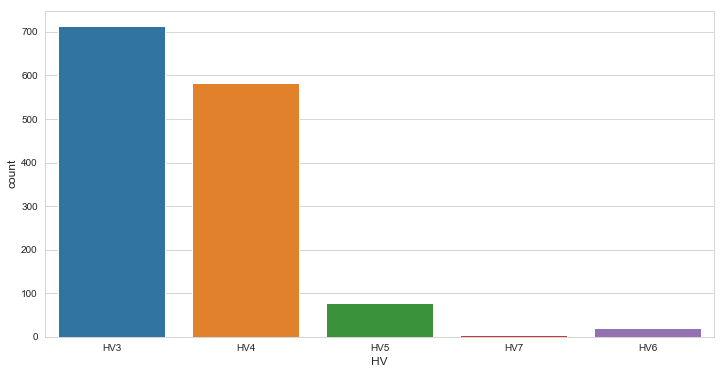

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.xlabel('Gene Type', size=12)
plt.ylabel('Count', size=12)
sns.countplot(MS_Data['HV'])

Above analysis graph supports the original hypothesis: VH3 is the most common and assuming random recombination, should be the most represented, although the research claims that VH4 is more prominent. 

In our data, we see that total VH3 recombination in cells is 709, whereas the total VH4 recombination is 577. So, VH3 recombination is significantly higher than VH4.

# Analysis 3: A natural association would be that OCBs are produced by expanded B-cells. Another potential association may be that patients with increased B-cells of subtypes CD19+CD138+ (plasmablasts) and/or CD19-CD138+ (plasma cells) may have OCBs or greater number of OCBs. It would be interesting to see if our data supports these hypotheses.

In [54]:
MS_Data['OCB +/-'].value_counts()

Not done               709
+                      533
DUPLICATE              139
-                       32
Couldn't find chart     31
Name: OCB +/-, dtype: int64

In [55]:
OCB_Analysis = MS_Data[MS_Data['OCB +/-'].isin(['+','-'])]

# Mature B Cells 

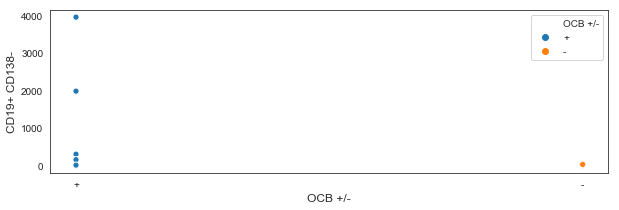

In [56]:
sns.set_style('white')
plt.figure(figsize=(10, 3))
plt.xlabel('CD19+ CD138-', size=12)
plt.ylabel('OCB +/-', size=12)
sns.scatterplot(OCB_Analysis['OCB +/-'], OCB_Analysis['CD19+ CD138-'],hue=OCB_Analysis['OCB +/-'])

# PlasmaBlasts

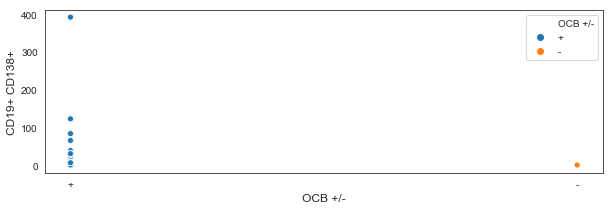

In [57]:
plt.figure(figsize=(10, 3))
plt.xlabel('CD19+ CD138+', size=12)
plt.ylabel('OCB +/-', size=12)
sns.scatterplot(OCB_Analysis['OCB +/-'], OCB_Analysis['CD19+ CD138+'], hue=OCB_Analysis['OCB +/-'] )

# Plasma Cells

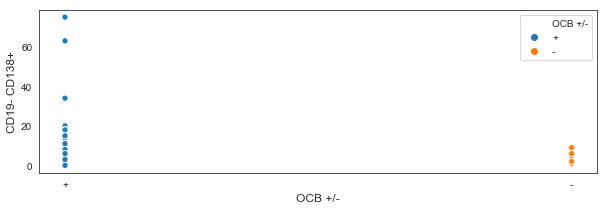

In [58]:
plt.figure(figsize=(10, 3))
plt.xlabel('CD19- CD138+', size=12)
plt.ylabel('OCB +/-', size=12)
sns.scatterplot(OCB_Analysis['OCB +/-'], OCB_Analysis['CD19- CD138+'],hue=OCB_Analysis['OCB +/-'] )

From above graphs, we can infer that Plasma cells (CD19- CD138+) have highest number of cells with OCB present, 
followed by Plasma blasts (CD19- CD138+) and Mature B Cells((CD19+ CD138-) has the least number of cells having OCBs

In [59]:
MS_Data.loc[MS_Data['OCB +/-'] == '+', 'OCB_Present'] = 1

In [60]:
MS_Data.loc[MS_Data['OCB +/-'] == '-', 'OCB_Present'] = 0

In [61]:
MS_Data.columns

Index([                    u'Sample',                       u'Cell',
                    u'H Sequence ID',        u'H V-GENE and allele',
         u'H V-DOMAIN Functionality',           u'H V-REGION score',
       u'H V-REGION identity % (nt)',        u'H J-GENE and allele',
                 u'H J-REGION score', u'H J-REGION identity % (nt)',
              u'H D-GENE and allele',   u'H D-REGION reading frame',
               u'H CDR-IMGT lengths',              u'H AA JUNCTION',
                      u'IgG/IgM/IgA',              u'L Sequence ID',
              u'L V-GENE and allele',   u'L V-DOMAIN Functionality',
                 u'L V-REGION score', u'L V-REGION identity % (nt)',
              u'L J-GENE and allele',           u'L J-REGION score',
       u'L J-REGION identity % (nt)',         u'L CDR-IMGT lengths',
                    u'L AA JUNCTION',                       u'Code',
        u'Date of Sample Collection',        u'Date of OCB Results',
                      u'Medics Cod

In [62]:
MS_Data['Treatment at time of tap'].value_counts()

None              783
ITMTX              66
Tecfidera          53
Doxycylcine        42
Steroids           41
MTX (oral)         40
Claribin           37
Rituximab          35
Ocrelizumab        30
Rebif              25
Rituximab/IVIG     22
Tysabri            12
Copaxone           11
IVIG               10
Gilenya             6
Copaxone/IVIG       4
Untreated           3
Rituxan             3
Name: Treatment at time of tap, dtype: int64

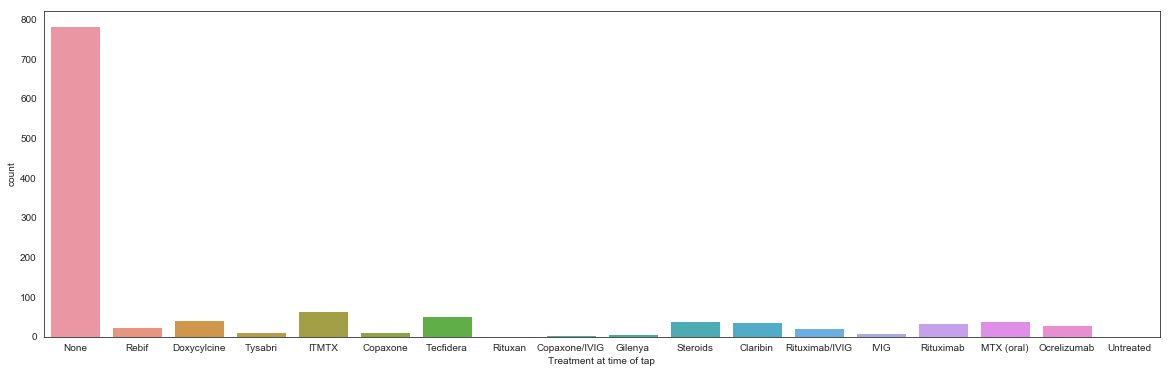

In [63]:
plt.figure(figsize=(20,6))
sns.countplot(MS_Data['Treatment at time of tap'])

In [64]:
MS_Data['IgG/IgM/IgA'].value_counts()

IgG    1094
IgM     445
IgA      53
Name: IgG/IgM/IgA, dtype: int64

Create an isotope type column

In [65]:
MS_Data.loc[MS_Data['IgG/IgM/IgA'] == 'IgG', 'Isotope'] = 'IgG'
MS_Data.loc[MS_Data['IgG/IgM/IgA'] == 'IgM', 'Isotope'] = 'IgM'
MS_Data.loc[MS_Data['IgG/IgM/IgA'] == 'IgA', 'Isotope'] = 'IgA'

In [66]:
MS_Data['Disease Type'].value_counts()

PPMS                                     546
SPMS                                     523
RRMS                                     445
No dx                                     39
Control                                   24
PPMS vs SPMS                              14
SPMS, Sjogren's, Rheumatoid Arthritis     12
ALS                                        9
Sarcoid                                    8
SPMS (early)                               7
No Dx                                      7
HTLV-1                                     4
SPMS vs Sjogren's                          3
Myelitis                                   1
Nonspecific white matter disease           1
No Dx, suspected not MS                    1
Transverse myelitis vs MS                  1
Name: Disease Type, dtype: int64

Categorizing all disease type other than PPMS, SPMS and RRPMS into an "Other" category. This would help with the classification dervied from different features

In [67]:
MS_Data.loc[~MS_Data['Disease Type'].isin(['PPMS','SPMS','RRMS']) , 'Disease Type'] = 'Other'

In [68]:
OCB.loc[~OCB['Disease Type'].isin(['PPMS','SPMS','RRMS']) , 'Disease Type'] = 'Other'

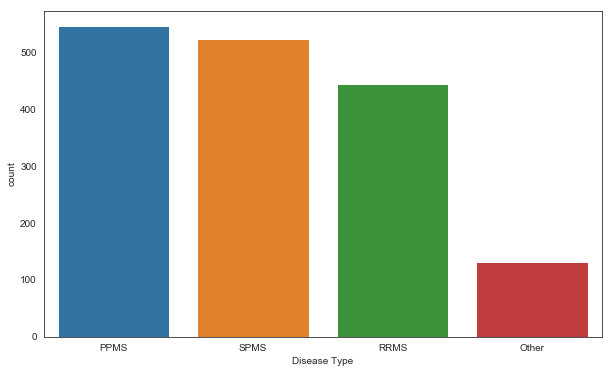

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(MS_Data['Disease Type'])

In [70]:
MS_Data['Disease Type'].value_counts()

PPMS     546
SPMS     523
RRMS     445
Other    131
Name: Disease Type, dtype: int64

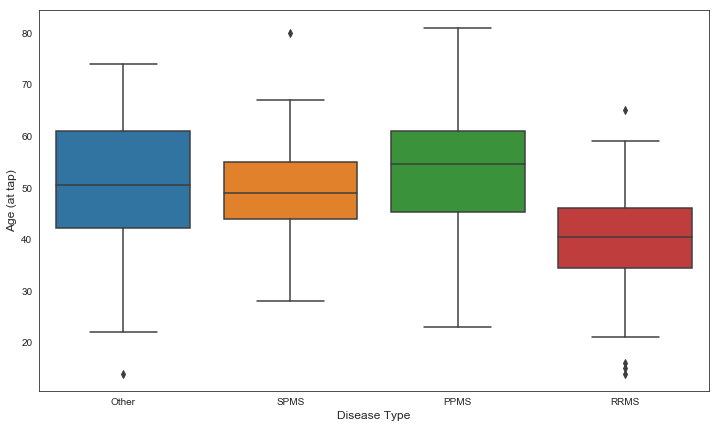

In [71]:
plt.figure(figsize=(12, 7))
plt.xlabel('Disease Type', size=12)
plt.ylabel('Age', size=12)
sns.boxplot(x='Disease Type',y='Age (at tap)',data=OCB)

Relation between Age and Disease Type : RRMS seems to be more prominent in younger people (average age < 40)

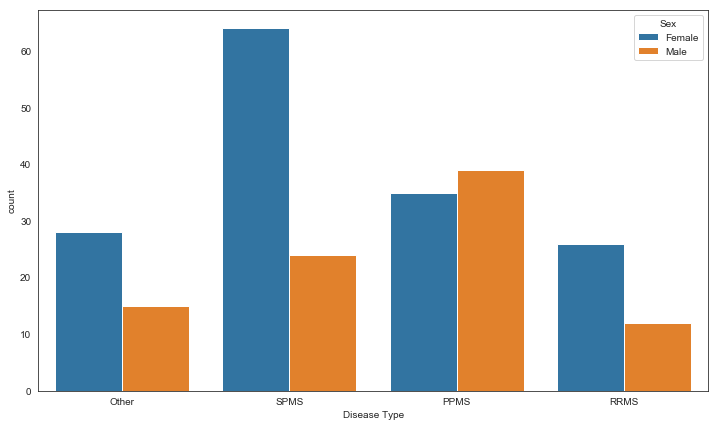

In [72]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Disease Type', data=OCB, hue='Sex')

SPMS and RRMS is more common in females, whereas Males have slightly higher number of PPMS 

In [73]:
MS_Data['EDSS'].unique()

array([ nan,  5. ,  0. ,  4.5,  4. ,  3. ,  8.5,  3.5,  9. ,  0.5,  2. ,
        1.5,  6.5,  6. ,  7. ,  8. ,  7.5,  2.5,  1. ,  5.5])

Cleanup: Replace nans in EDSS data with 0

In [74]:
MS_Data['EDSS'] = MS_Data['EDSS'].fillna('0')

In [75]:
MS_Data.EDSS.unique()

array(['0', 5.0, 0.0, 4.5, 4.0, 3.0, 8.5, 3.5, 9.0, 0.5, 2.0, 1.5, 6.5,
       6.0, 7.0, 8.0, 7.5, 2.5, 1.0, 5.5], dtype=object)

In [76]:
MS_Data['EDSS'] = MS_Data['EDSS'].astype('float')

Encoding Sex to 0 and 1

In [77]:
MS_Data['Sex'].value_counts()

Male      831
Female    814
Name: Sex, dtype: int64

In [78]:
MS_Data.loc[MS_Data['Sex'] == 'Male', 'Sex'] = 0

In [79]:
MS_Data.loc[MS_Data['Sex'] == 'Female', 'Sex'] = 1

Use CDR Image Lengths to find patterns in length. First number before the . is CDR1, second is CDR2 an third is CDR3

In [80]:
MS_Data['H CDR-IMGT lengths'] = MS_Data['H CDR-IMGT lengths'].str[1:-1]

In [81]:
MS_Data['H CDR1 Length'] = MS_Data['H CDR-IMGT lengths'].str.split('.')[1][0]

In [82]:
MS_Data['H CDR2 Length'] = MS_Data['H CDR-IMGT lengths'].str.split('.')[1][1]

In [83]:
MS_Data['H CDR3 Length'] = MS_Data['H CDR-IMGT lengths'].str.split('.')[1][2]

In [84]:
MS_Data['L CDR-IMGT lengths'] = MS_Data['L CDR-IMGT lengths'].str[1:-1]

In [85]:
MS_Data['L CDR1 Length'] = MS_Data['L CDR-IMGT lengths'].str.split('.')[1][0]

In [86]:
MS_Data['L CDR2 Length'] = MS_Data['L CDR-IMGT lengths'].str.split('.')[1][1]

In [87]:
MS_Data['L CDR3 Length'] = MS_Data['L CDR-IMGT lengths'].str.split('.')[1][2]

In [88]:
MS_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 1 to 3813
Data columns (total 53 columns):
Sample                        1645 non-null object
Cell                          1645 non-null object
H Sequence ID                 1645 non-null object
H V-GENE and allele           1645 non-null object
H V-DOMAIN Functionality      1645 non-null object
H V-REGION score              1645 non-null object
H V-REGION identity % (nt)    1645 non-null float64
H J-GENE and allele           1645 non-null object
H J-REGION score              1645 non-null object
H J-REGION identity % (nt)    1645 non-null float64
H D-GENE and allele           1644 non-null object
H D-REGION reading frame      1644 non-null object
H CDR-IMGT lengths            1645 non-null object
H AA JUNCTION                 1645 non-null object
IgG/IgM/IgA                   1592 non-null object
L Sequence ID                 1645 non-null object
L V-GENE and allele           1645 non-null object
L V-DOMAIN Functionality

One hot encoding for Treatment, Isotope, Disease Type and Sex to create final dataframe for Disease Type prediction

In [89]:
df = pd.get_dummies(MS_Data, columns=["Treatment at time of tap" , "Isotope", "Disease Type"], prefix=["Treatment", "Isotope", "MS"])

In [90]:
df.columns

Index([                    u'Sample',                       u'Cell',
                    u'H Sequence ID',        u'H V-GENE and allele',
         u'H V-DOMAIN Functionality',           u'H V-REGION score',
       u'H V-REGION identity % (nt)',        u'H J-GENE and allele',
                 u'H J-REGION score', u'H J-REGION identity % (nt)',
              u'H D-GENE and allele',   u'H D-REGION reading frame',
               u'H CDR-IMGT lengths',              u'H AA JUNCTION',
                      u'IgG/IgM/IgA',              u'L Sequence ID',
              u'L V-GENE and allele',   u'L V-DOMAIN Functionality',
                 u'L V-REGION score', u'L V-REGION identity % (nt)',
              u'L J-GENE and allele',           u'L J-REGION score',
       u'L J-REGION identity % (nt)',         u'L CDR-IMGT lengths',
                    u'L AA JUNCTION',                       u'Code',
        u'Date of Sample Collection',        u'Date of OCB Results',
                      u'Medics Cod

In [91]:
df.head()

,Sample,Cell,H Sequence ID,H V-GENE and allele,H V-DOMAIN Functionality,H V-REGION score,H V-REGION identity % (nt),H J-GENE and allele,H J-REGION score,H J-REGION identity % (nt),...,Treatment_Tecfidera,Treatment_Tysabri,Treatment_Untreated,Isotope_IgA,Isotope_IgG,Isotope_IgM,MS_Other,MS_PPMS,MS_RRMS,MS_SPMS
1,A1577,A1577c2,A1577_H2-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",PRODUCTIVE,1300,0.9479,"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,0.8235,...,0,0,0,0,1,0,0,1,0,0
3,A1577,A1577c4,A1577_H4-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",PRODUCTIVE,1300,0.9479,"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,0.8235,...,0,0,0,0,1,0,0,1,0,0
5,A1577,A1577c6,A1577_H6-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",PRODUCTIVE,1300,0.9479,"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,0.8235,...,0,0,0,0,1,0,0,1,0,0
7,A1577,A1577c8,A1577_H8-1,"Homsap IGHV3-30*03 F, or Homsap IGHV3-30*18 F ...",PRODUCTIVE,1300,0.9479,"Homsap IGHJ5*01 F, or Homsap IGHJ5*02 F",174,0.8235,...,0,0,0,0,1,0,0,1,0,0
8,B1598,B1598c1,B1598_H1-1,"IGHV3-30*03, or IGHV3-30*18, or IGHV3-30-5*01 F",PRODUCTIVE,1417,0.9931,IGHJ3*02,232,0.9600,...,0,0,0,0,0,1,0,0,0,1


# Correlation between EDSS and Treatment at time of tap 

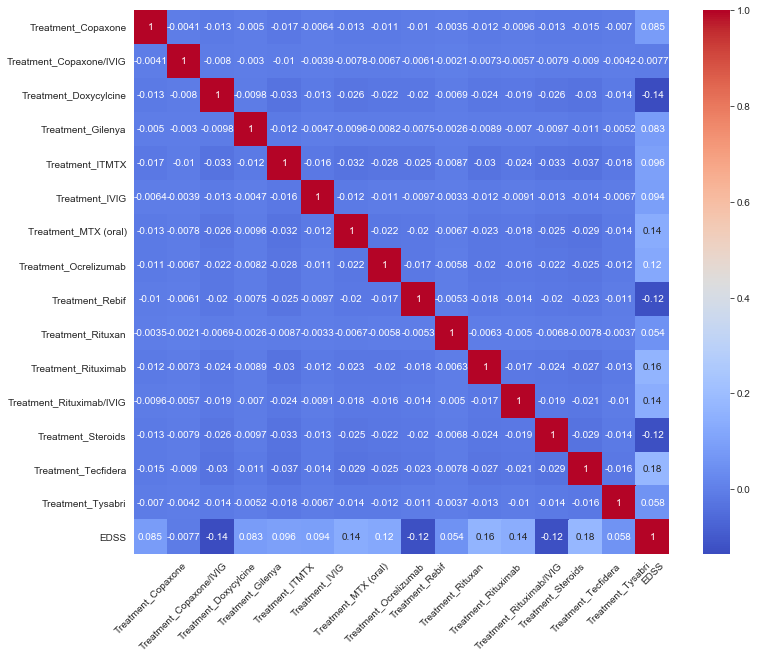

In [92]:
# Correlations between selected features and response
fig = plt.figure(figsize=(12, 10))
# feature = 'Treatment at time of tap'
features = [ 'Treatment_Copaxone', 'Treatment_Copaxone/IVIG', 'Treatment_Doxycylcine',  'Treatment_Gilenya', 'Treatment_ITMTX', 'Treatment_IVIG', 'Treatment_MTX (oral)',
   'Treatment_Ocrelizumab', 'Treatment_Rebif', 'Treatment_Rituxan','Treatment_Rituximab', 'Treatment_Rituximab/IVIG',  'Treatment_Steroids',  'Treatment_Tecfidera',        
  'Treatment_Tysabri']
sns.heatmap(df[ features + ['EDSS']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

EDSS (Disability Level) is positively correlated with Tecfidera, Rituximab, Ritximab/IVIG and MTX(Oral) Treatments

# Correlation between  Treatment at time of tap and Disease Type 

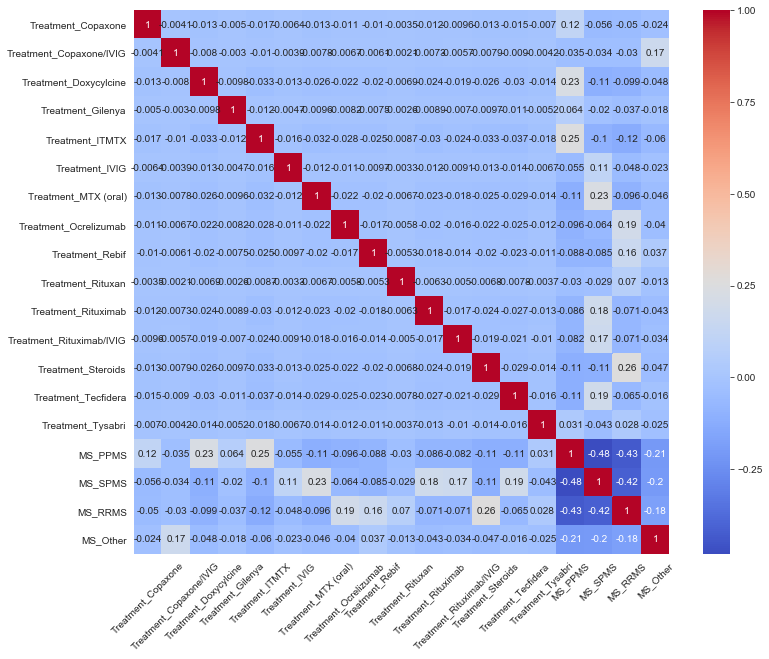

In [93]:
# Correlations between selected features and response
fig = plt.figure(figsize=(12, 10))
features = [ 'Treatment_Copaxone', 'Treatment_Copaxone/IVIG', 'Treatment_Doxycylcine',  'Treatment_Gilenya', 'Treatment_ITMTX', 'Treatment_IVIG', 'Treatment_MTX (oral)', 
   'Treatment_Ocrelizumab', 'Treatment_Rebif', 'Treatment_Rituxan','Treatment_Rituximab', 'Treatment_Rituximab/IVIG',  'Treatment_Steroids',  'Treatment_Tecfidera',        
  'Treatment_Tysabri']
sns.heatmap(df[features + ['MS_PPMS','MS_SPMS', 'MS_RRMS', 'MS_Other' ]].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

From above plot, we see the following observations: 
    a) A positive correlation between PPMS and Doxycylcine, ITMTX treatments
    b) A positive correlation between SPMS and MTX (Oral) treatments
    c) A positive correlation between RRMS and No Treatment
    d) Other diseases have positive correlation with Copaxone/IVIG

# Correlation between Region Identity % and Disease Type

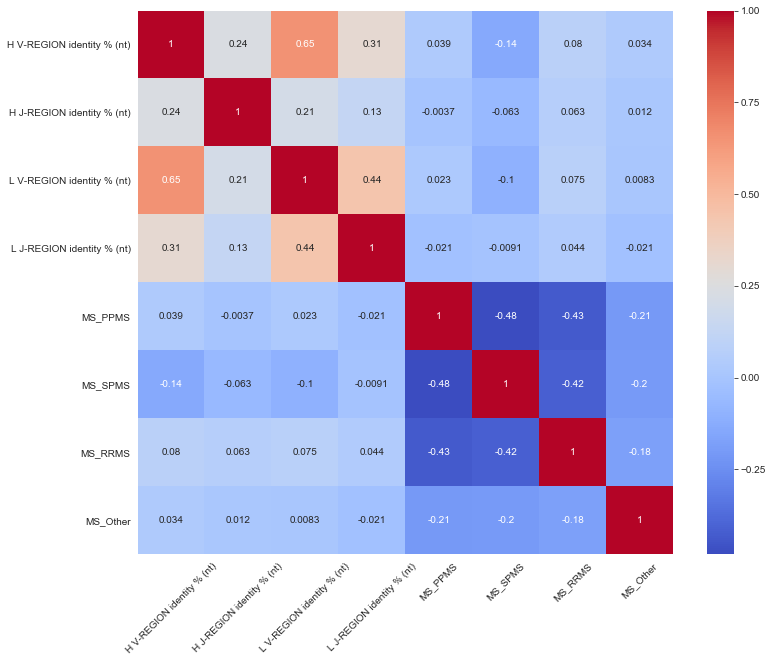

In [94]:
# Correlations between selected features and response
fig = plt.figure(figsize=(12, 10))
features = ['H V-REGION identity % (nt)', 'H J-REGION identity % (nt)', 'L V-REGION identity % (nt)', 'L J-REGION identity % (nt)' ]
sns.heatmap(df[features + ['MS_PPMS', 'MS_SPMS','MS_RRMS', 'MS_Other']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

Region scores are strongly correlated among one another

# Correlation between ISOTOPE and Disease Type

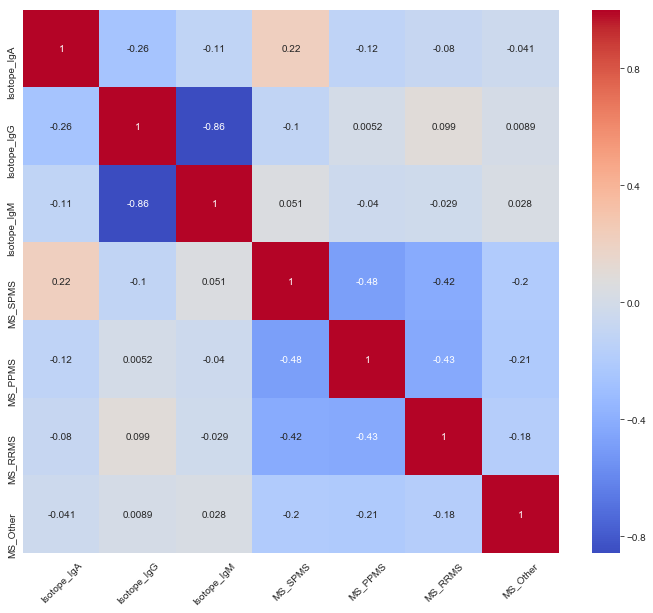

In [95]:
# Correlations between selected features and response
fig = plt.figure(figsize=(12, 10))
features = [ 'Isotope_IgA',  'Isotope_IgG',
 'Isotope_IgM']
sns.heatmap(df[features + ['MS_SPMS','MS_PPMS','MS_RRMS','MS_Other']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

IgA has certain positive correlation with SPMS Diesase type

# Applying a RandomForest classifier with feature scaling 

Select important features derived from EDA and feature engineering above

In [96]:
feature_cols = [ 'H V-REGION identity % (nt)', 'L V-REGION identity % (nt)', 
                        'Treatment_Copaxone', 'Treatment_Copaxone/IVIG', 'Treatment_Doxycylcine',  'Treatment_Gilenya', 
                            'Treatment_ITMTX', 'Treatment_IVIG', 'Treatment_MTX (oral)',  'Treatment_None',
               'Treatment_Ocrelizumab', 'Treatment_Rebif', 'Treatment_Rituxan','Treatment_Rituximab',
                            'Treatment_Rituximab/IVIG',  'Treatment_Steroids',  'Treatment_Tecfidera',        
              'Treatment_Tysabri', 'Treatment_Untreated', 'EDSS', 
                'H CDR1 Length', 'L CDR1 Length', 'H CDR2 Length', 'L CDR2 Length', 'H CDR3 Length', 'L CDR3 Length'
            ,'Isotope_IgA',  'Isotope_IgG', 
             'Isotope_IgM', 'Age (at tap)', 'Sex', 'CD19- CD138+', 'CD19+ CD138+', 'CD19+ CD138-', 'Number of Lymphocytes']

In [97]:
target_cols = [
                                        'MS_PPMS',
                                        'MS_SPMS',
                                        'MS_RRMS',
                                        'MS_Other'                  
                                       
                        ]

In [98]:
df = df[['Medics Code','Sample', 'Cell'] + feature_cols + target_cols ]

In [99]:
df.head()

,Medics Code,Sample,Cell,H V-REGION identity % (nt),L V-REGION identity % (nt),Treatment_Copaxone,Treatment_Copaxone/IVIG,Treatment_Doxycylcine,Treatment_Gilenya,Treatment_ITMTX,...,Age (at tap),Sex,CD19- CD138+,CD19+ CD138+,CD19+ CD138-,Number of Lymphocytes,MS_PPMS,MS_SPMS,MS_RRMS,MS_Other
1,28608.0,A1577,A1577c2,0.9479,0.9135,0,0,0,0,0,...,53.0,0,3.0,9.0,10.0,1701.0,1,0,0,0
3,28608.0,A1577,A1577c4,0.9479,0.9410,0,0,0,0,0,...,53.0,0,3.0,9.0,10.0,1701.0,1,0,0,0
5,28608.0,A1577,A1577c6,0.9479,0.9340,0,0,0,0,0,...,53.0,0,3.0,9.0,10.0,1701.0,1,0,0,0
7,28608.0,A1577,A1577c8,0.9479,0.9306,0,0,0,0,0,...,53.0,0,3.0,9.0,10.0,1701.0,1,0,0,0
8,28521.0,B1598,B1598c1,0.9931,0.9965,0,0,0,0,0,...,32.0,0,4.0,0.0,1.0,1032.0,0,1,0,0


In [100]:
df.isnull().sum()

Medics Code                    0
Sample                         0
Cell                           0
H V-REGION identity % (nt)     0
L V-REGION identity % (nt)     1
Treatment_Copaxone             0
Treatment_Copaxone/IVIG        0
Treatment_Doxycylcine          0
Treatment_Gilenya              0
Treatment_ITMTX                0
Treatment_IVIG                 0
Treatment_MTX (oral)           0
Treatment_None                 0
Treatment_Ocrelizumab          0
Treatment_Rebif                0
Treatment_Rituxan              0
Treatment_Rituximab            0
Treatment_Rituximab/IVIG       0
Treatment_Steroids             0
Treatment_Tecfidera            0
Treatment_Tysabri              0
Treatment_Untreated            0
EDSS                           0
H CDR1 Length                  0
L CDR1 Length                  0
H CDR2 Length                  0
L CDR2 Length                  0
H CDR3 Length                  0
L CDR3 Length                  0
Isotope_IgA                    0
Isotope_Ig

In [101]:
df.shape

(1645, 42)

In [102]:
#Remove nans in the data to apply scaling

In [103]:
df.dropna(axis=0,inplace=True)
#train_df['L J-REGION identity % (nt)'].fillna(0, axis=1,inplace=True)

In [104]:
df.shape

(1600, 42)

Applying feature scaling to standardize the features

In [105]:
scaler = StandardScaler()
scaler.fit(df[feature_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [106]:
scaled_data = scaler.transform(df[feature_cols])

In [107]:
from sklearn.model_selection import train_test_split

Splitting data into train and test

In [108]:
X = scaled_data
y = df[target_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [109]:
X.shape, y.shape

((1600L, 35L), (1600, 4))

Using Random Forest Classifier to train the data

In [108]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [109]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=5, min_samples_split=100, \
                                       max_features=10)

In [110]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
predictions = rfc.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, accuracy_score

In [113]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91       101
          1       1.00      0.79      0.88       117
          2       1.00      0.86      0.92        71

avg / total       0.98      0.84      0.90       289



In [114]:
print("Training Accuracy:", accuracy_score(y_test,predictions))

('Training Accuracy:', 0.84375)


# Apply 10-fold cross-validation for testing

In [115]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [116]:
from sklearn import metrics

In [117]:
def cross_validate(model):
    scores = cross_val_score(model,X,y,cv=10,scoring='accuracy')
    print('Average Accuracy:\n', np.mean(scores))
    predictions = cross_val_predict(model,X_test,y_test,cv=10)
    accuracy = metrics.accuracy_score(y_test,predictions)
    print('Test Accuracy after 10-fold cross validation:\n', accuracy)

In [118]:
cross_validate(rfc)

('Average Accuracy:\n', 0.37437500000000001)
('Test Accuracy after 10-fold cross validation:\n', 0.45624999999999999)


# Apply GridSearchCV to tune the parameters and improve accuracy

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {"max_depth": [5,10,20],
              "max_features" : [5,10,30],
              "n_estimators": [100,500,1000],
              }

In [121]:
gs_cv = GridSearchCV(rfc, param_grid=param_grid, cv = 10, scoring='accuracy', verbose=10, n_jobs=-1 ).fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Paralle

Selecting the best hyperparameters dervied from GridSearch and create improved model

In [122]:
gs_cv.estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
best_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
predictions = best_model.predict(X_test)

In [126]:
print("Accuracy:", accuracy_score(y_test,predictions))

('Accuracy:', 0.890625)


In [127]:
cross_validate(best_model)

('Average Accuracy:\n', 0.35312500000000002)
('Test Accuracy after 10-fold cross validation:\n', 0.46875)


Get important features from the tuned model

In [128]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'feature':feature_cols, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

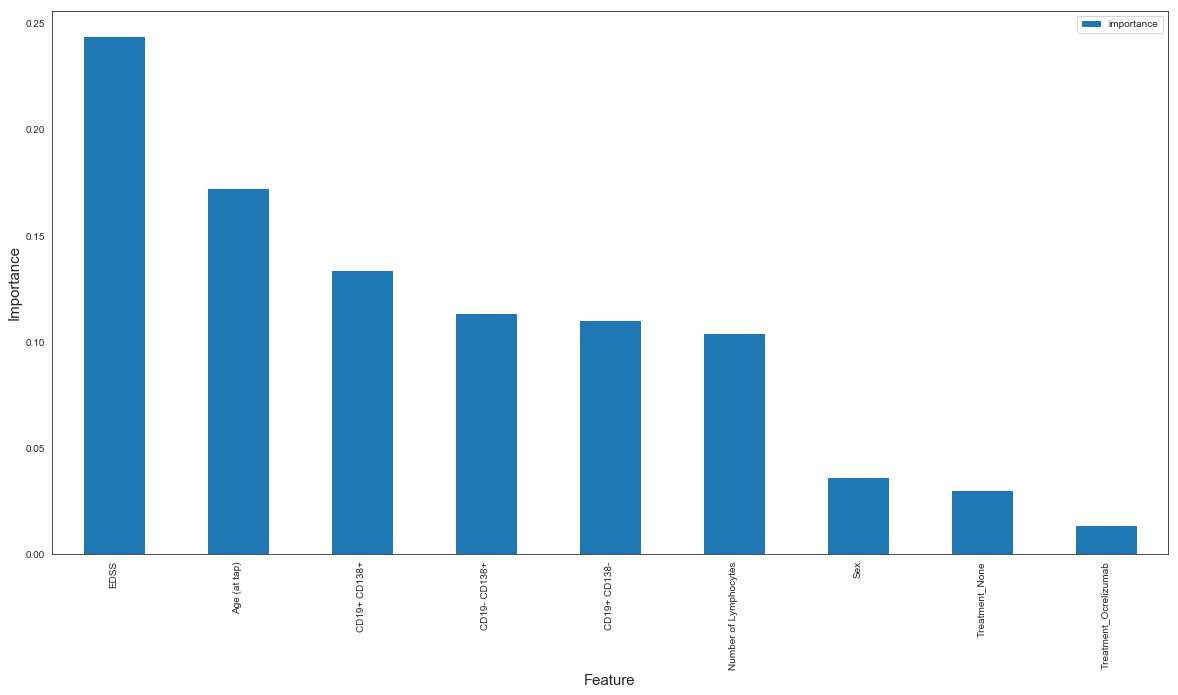

In [339]:
sns.set_style('white')
feature_importances[0:9].plot.bar(figsize=(20,10))
plt.xlabel('Feature', size=15)
plt.ylabel('Importance', size=15)
plt.show()


This shows that the EDSS, Age (at tap), number of B cells (PlasmaBlast, Plasma), Number of Lymphocytes and Sex are the most important factors in determining the type of MS condition the patient is facing 

# Apply PCA with K-means clustering to identify patterns

Select best features using the above plot

In [277]:
best_features = ['EDSS', 'Age (at tap)', 'CD19+ CD138+', 'CD19- CD138+', 'CD19+ CD138-', 'Number of Lymphocytes',
                 'Sex', 'Treatment_None', 'Treatment_Ocrelizumab']

In [278]:
scaled_data = scaler.fit_transform(df[best_features])

Apply Principal Component Analysis (PCA) to project data into 2 dimensions to reduce sparsity and improve visualization

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [280]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [281]:
x_pca = pca.transform(scaled_data)

In [282]:
scaled_data.shape

(1600L, 9L)

In [283]:
x_pca.shape

(1600L, 2L)

Text(0,0.5,u'Second Principal Component')

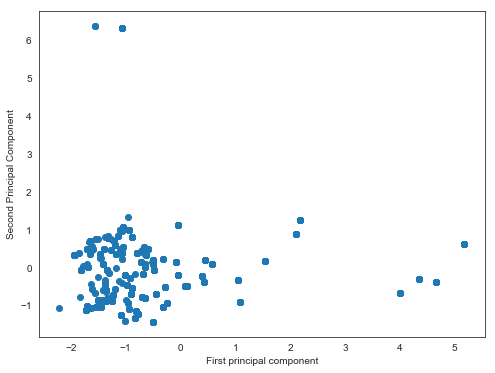

In [284]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Apply K-Means clustering with 3 clusters to find the patterns amongst different clusters

In [285]:
cluster = KMeans(n_clusters = 3) 

In [286]:
pca = PCA(n_components = 2)
df['x'] = x_pca[:,0]
df['y'] = x_pca[:,1]
#df = df.reset_index()

df["cluster"] = cluster.fit_predict(scaled_data)

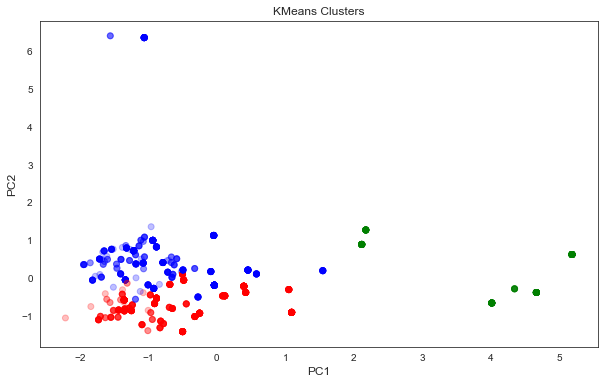

In [308]:
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in cluster.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="x", y="y", data=df, alpha=0.25, color = kmeans_colors)
plt.xlabel("PC1",size=12)
plt.ylabel("PC2",size=12)
plt.title("KMeans Clusters")
plt.show()

From above plot, we can clearly see the 2 principal components divided into 3 different clusters

  Green = Cluster 1
, Red = Cluster 2
, Blue = Cluster 3

# Next step is to detect patterns in each of the 3 clusters seen above

In [289]:
df.head(10)

,level_0,index,Medics Code,Sample,Cell,H V-REGION identity % (nt),L V-REGION identity % (nt),Treatment_Copaxone,Treatment_Copaxone/IVIG,Treatment_Doxycylcine,...,CD19- CD138+,CD19+ CD138+,CD19+ CD138-,Number of Lymphocytes,MS_PPMS,MS_SPMS,MS_RRMS,x,y,cluster
0,0,1,28608.0,A1577,A1577c2,0.9479,0.9135,0,0,0,...,3.0,9.0,10.0,1701.0,1,0,0,-1.509632,-0.854291,1
1,1,3,28608.0,A1577,A1577c4,0.9479,0.9410,0,0,0,...,3.0,9.0,10.0,1701.0,1,0,0,-1.509632,-0.854291,1
2,2,5,28608.0,A1577,A1577c6,0.9479,0.9340,0,0,0,...,3.0,9.0,10.0,1701.0,1,0,0,-1.509632,-0.854291,1
3,3,7,28608.0,A1577,A1577c8,0.9479,0.9306,0,0,0,...,3.0,9.0,10.0,1701.0,1,0,0,-1.509632,-0.854291,1
4,4,8,28521.0,B1598,B1598c1,0.9931,0.9965,0,0,0,...,4.0,0.0,1.0,1032.0,0,1,0,-1.074198,-0.387288,1
5,5,12,28655.0,B1623,B1623c4,0.9684,0.9173,0,0,0,...,3.0,0.0,2.0,981.0,0,1,0,-1.707002,0.094594,2
6,6,14,28621.0,C1624,C1624c2,0.9193,0.9529,0,0,0,...,3.0,3.0,2.0,1283.0,0,1,0,-1.378586,0.809918,2
7,7,21,28593.0,C1634,C1634c1,0.8785,0.9032,0,0,0,...,1.0,7.0,6.0,1252.0,1,0,0,-1.698505,-1.011448,1
8,8,22,28593.0,C1634,C1634c2,0.9792,0.9642,0,0,0,...,1.0,7.0,6.0,1252.0,1,0,0,-1.698505,-1.011448,1
9,9,23,28593.0,C1634,C1634c3,0.9263,0.9534,0,0,0,...,1.0,7.0,6.0,1252.0,1,0,0,-1.698505,-1.011448,1


Merge clustering information with original MS_Data to detect patterns

In [290]:
final_df = pd.merge(df[['Sample', 'Cell', 'Medics Code', 'x', 'y','cluster']], MS_Data, on='Cell', how='inner')

In [291]:
final_df['cluster'].value_counts()

1    710
2    674
0    216
Name: cluster, dtype: int64

In [312]:
final_df['Cluster_1'] = final_df['cluster'] == 1
final_df['Cluster_2'] = final_df['cluster'] == 2
final_df['Cluster_3'] = final_df['cluster'] == 3

# Patterns in Isotope Type

In [313]:
(final_df.groupby('Cluster_1')['Isotope'].value_counts(),
 final_df.groupby('Cluster_2')['Isotope'].value_counts(),
 final_df.groupby('Cluster_3')['Isotope'].value_counts())

(Cluster_1  Isotope
 False      IgG        594
            IgM        242
            IgA          7
 True       IgG        468
            IgM        191
            IgA         46
 Name: Isotope, dtype: int64, Cluster_2  Isotope
 False      IgG        621
            IgM        209
            IgA         48
 True       IgG        441
            IgM        224
            IgA          5
 Name: Isotope, dtype: int64, Cluster_3  Isotope
 False      IgG        1062
            IgM         433
            IgA          53
 Name: Isotope, dtype: int64)

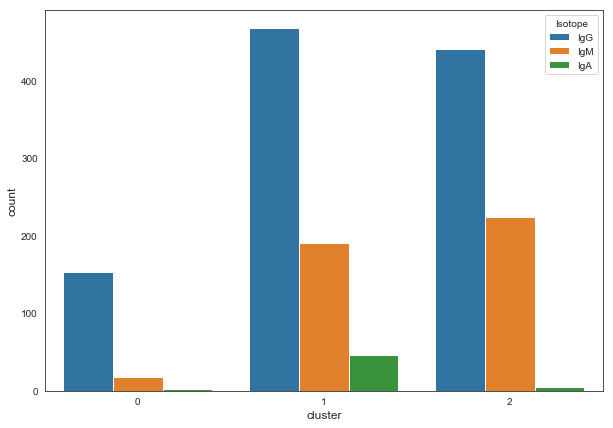

In [315]:
plt.figure(figsize=(10,7))
plt.xlabel('Cluster', size=12)
plt.ylabel('Counts', size=12)
sns.countplot(x='cluster',data=final_df,hue='Isotope')

# Finding: First Cluster (0) mostly consists Isotope IgG whereas Isotope IgA is mostly found in Second Cluster (1)

# Patterns in Region Identity %

In [295]:
# Patterns in H-V, H-J and L-V, L-J Region Identity %

(final_df.groupby('Cluster_1')['H V-REGION identity % (nt)'].mean(),
 final_df.groupby('Cluster_2')['H V-REGION identity % (nt)'].mean(),
final_df.groupby('Cluster_3')['H V-REGION identity % (nt)'].mean())

(Cluster_1
 False    0.938409
 True     0.940524
 Name: H V-REGION identity % (nt), dtype: float64, Cluster_2
 False    0.943825
 True     0.932263
 Name: H V-REGION identity % (nt), dtype: float64, Cluster_3
 False    0.934190
 True     0.944883
 Name: H V-REGION identity % (nt), dtype: float64)

In [297]:
(final_df.groupby('Cluster_1')['H J-REGION identity % (nt)'].mean(), 
 final_df.groupby('Cluster_2')['H J-REGION identity % (nt)'].mean(), 
 final_df.groupby('Cluster_3')['H J-REGION identity % (nt)'].mean())

(Cluster_1
 False    0.888690
 True     0.886672
 Name: H J-REGION identity % (nt), dtype: float64, Cluster_2
 False    0.88943
 True     0.88715
 Name: H J-REGION identity % (nt), dtype: float64, Cluster_3
 False    0.887038
 True     0.890313
 Name: H J-REGION identity % (nt), dtype: float64)

In [296]:
(final_df.groupby('Cluster_1')['L V-REGION identity % (nt)'].mean(),
final_df.groupby('Cluster_2')['L V-REGION identity % (nt)'].mean(),
final_df.groupby('Cluster_3')['L V-REGION identity % (nt)'].mean())

(Cluster_1
 False    0.958123
 True     0.958381
 Name: L V-REGION identity % (nt), dtype: float64, Cluster_2
 False    0.960741
 True     0.954920
 Name: L V-REGION identity % (nt), dtype: float64, Cluster_3
 False    0.955727
 True     0.961498
 Name: L V-REGION identity % (nt), dtype: float64)

In [ ]:
# Add a graph
sns.boxplot()

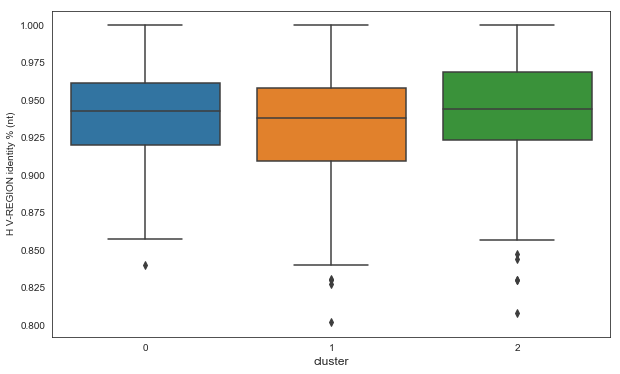

In [346]:
#Add a graph
plt.figure(figsize = (10,6) )
plt.xlabel('cluster', size='12')
sns.boxplot(x='cluster', y='H V-REGION identity % (nt)' ,data = final_df)

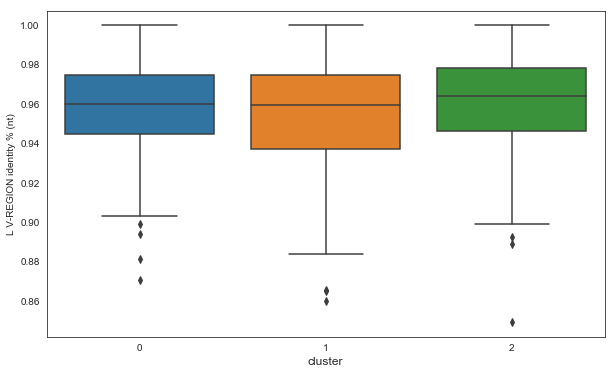

In [348]:
#Add a graph
plt.figure(figsize = (10,6) )
plt.xlabel('cluster', size='12')
sns.boxplot(x='cluster', y='L V-REGION identity % (nt)' ,data = final_df)

# Finding: Third cluster (2) has slightly higher average H-V, L-V and H-J, L-J region identity % than the other two clusters which means the cells are less mutated and patients in this cluster have lower antigen exposure

# Patterns in number of PlasmaBlasts (CD19+ CD138+) and PlasmaCells (CD19- CD138+), number of lymphocytes

In [299]:
(final_df.groupby('Cluster_1')['CD19+ CD138+'].mean(),
final_df.groupby('Cluster_2')['CD19+ CD138+'].mean(),
final_df.groupby('Cluster_3')['CD19+ CD138+'].mean())

(Cluster_1
 False     68.971098
 True     732.467593
 Name: CD19+ CD138+, dtype: float64, Cluster_2
 False    217.048315
 True      85.205634
 Name: CD19+ CD138+, dtype: float64, Cluster_3
 False    236.186825
 True      51.869436
 Name: CD19+ CD138+, dtype: float64)

In [300]:
(final_df.groupby('Cluster_1')['CD19- CD138+'].mean(),
final_df.groupby('Cluster_2')['CD19- CD138+'].mean(),
final_df.groupby('Cluster_3')['CD19- CD138+'].mean())

(Cluster_1
 False    19.822254
 True     94.902778
 Name: CD19- CD138+, dtype: float64, Cluster_2
 False    37.049438
 True     21.069014
 Name: CD19- CD138+, dtype: float64, Cluster_3
 False    38.291577
 True     18.508902
 Name: CD19- CD138+, dtype: float64)

In [301]:
(final_df.groupby('Cluster_1')['CD19+ CD138-'].mean(),
final_df.groupby('Cluster_2')['CD19+ CD138-'].mean(),
final_df.groupby('Cluster_3')['CD19+ CD138-'].mean())

(Cluster_1
 False     127.267341
 True     1541.685185
 Name: CD19+ CD138-, dtype: float64, Cluster_2
 False    472.708989
 True     124.550704
 Name: CD19+ CD138-, dtype: float64, Cluster_3
 False    455.113391
 True     130.129080
 Name: CD19+ CD138-, dtype: float64)

In [302]:
(final_df.groupby('Cluster_1')['Number of Lymphocytes'].mean(),
final_df.groupby('Cluster_2')['Number of Lymphocytes'].mean(),
final_df.groupby('Cluster_3')['Number of Lymphocytes'].mean())

(Cluster_1
 False    10996.337428
 True     59621.365741
 Name: Number of Lymphocytes, dtype: float64, Cluster_2
 False    21588.864045
 True     12511.347887
 Name: Number of Lymphocytes, dtype: float64, Cluster_3
 False    23500.293737
 True      9400.406528
 Name: Number of Lymphocytes, dtype: float64)

Add a graph for number of each Mature B Cells ('CD19+ CD138-'), Plasmablasts ('CD19+ cd138-')  Plasmacells ('CD19- CD138+') and number of Lymphocytes 
for each of the 3 clusters

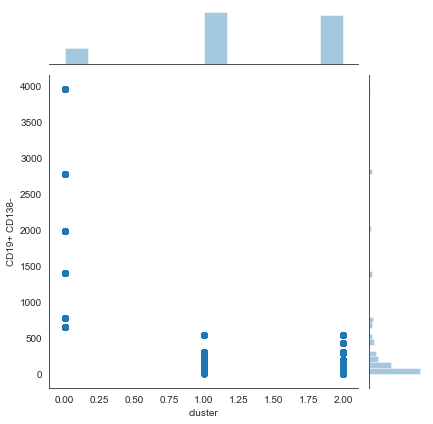

In [397]:
#Add a graph
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.jointplot(x='cluster', y= 'CD19+ CD138-', data=final_df)

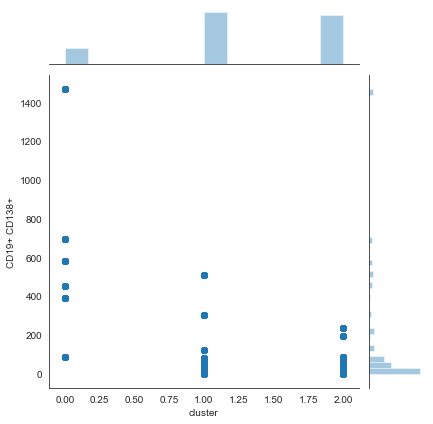

In [398]:
#Add a graph
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.jointplot(x='cluster', y= 'CD19+ CD138+', data=final_df)

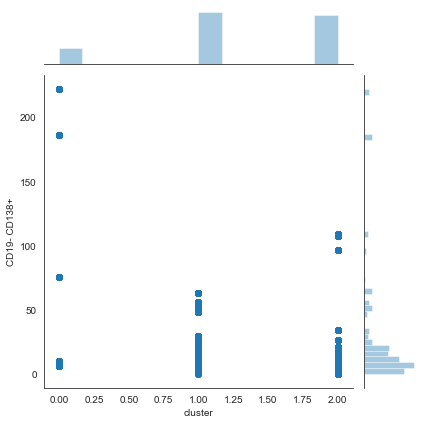

In [399]:
#Add a graph
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.jointplot(x='cluster', y= 'CD19- CD138+', data=final_df)

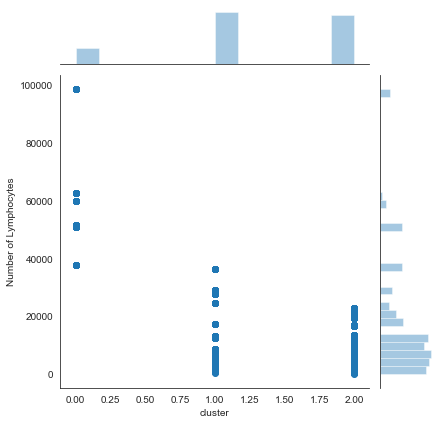

In [404]:
#Add a graph
sns.set_style('white')
sns.jointplot(x='cluster', y= 'Number of Lymphocytes', data=final_df)


# Finding: Above plots show that the samples in first clusterc(0) have higher number of B-Cell Subtypes Plasmablasts and Plasmacells and Lymphocytes present on average compared to the other clusters

# Patterns in EDSS (Disability Levels)

In [303]:
(final_df.groupby('Cluster_1')['EDSS'].mean(),
 final_df.groupby('Cluster_2')['EDSS'].mean(),
final_df.groupby('Cluster_3')['EDSS'].mean())

(Cluster_1
 False    2.903540
 True     3.064815
 Name: EDSS, dtype: float64, Cluster_2
 False    2.887640
 True     2.972535
 Name: EDSS, dtype: float64, Cluster_3
 False    2.994060
 True     2.830861
 Name: EDSS, dtype: float64)

# Finding: Patients in Cluster 1 have a higher EDSS compared to the other clusters

# Patterns in Age and Sex

Age distribution for each cluster

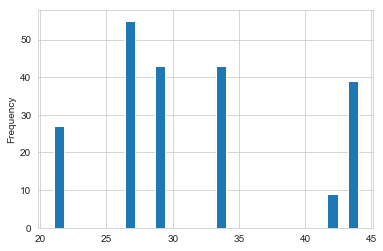

In [375]:
sns.set_style('whitegrid')

final_df[final_df['cluster'] == 0]['Age (at tap)'].plot(kind='hist',bins=30)

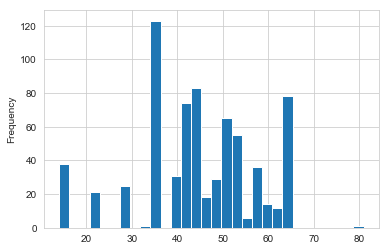

In [374]:

final_df[final_df['cluster'] == 1]['Age (at tap)'].plot(kind='hist',bins=30)

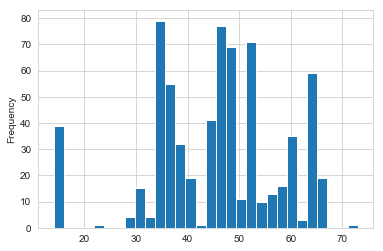

In [376]:
final_df[final_df['cluster'] == 2]['Age (at tap)'].plot(kind='hist',bins=30)

In [304]:
(final_df.groupby('Cluster_1')['Age (at tap)'].mean(), 
 final_df.groupby('Cluster_2')['Age (at tap)'].mean(),
final_df.groupby('Cluster_3')['Age (at tap)'].mean())

(Cluster_1
 False    45.123555
 True     31.736111
 Name: Age (at tap), dtype: float64, Cluster_2
 False    42.205618
 True     44.708451
 Name: Age (at tap), dtype: float64, Cluster_3
 False    41.682505
 True     45.560831
 Name: Age (at tap), dtype: float64)

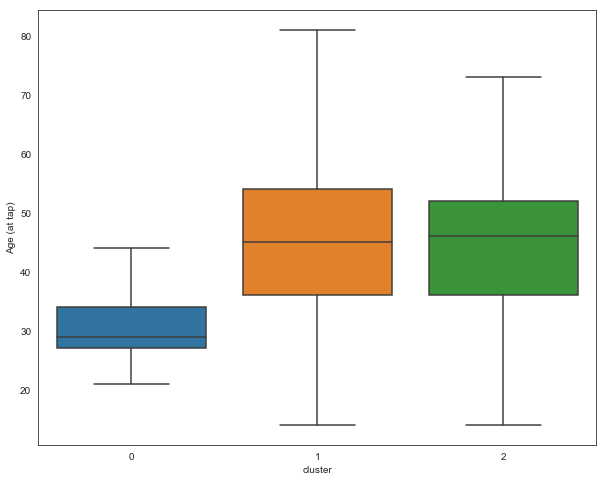

In [406]:
plt.figure(figsize = (10,8))
sns.boxplot(x='cluster', y='Age (at tap)', data = final_df)

# Finding : First cluster contains the youngest patient distribution with average age of 30. Second and thirs clusters have a similar age distribution 


In [305]:
(final_df.groupby('Cluster_1')['Sex'].value_counts(), 
 final_df.groupby('Cluster_2')['Sex'].value_counts(),
final_df.groupby('Cluster_3')['Sex'].value_counts())

(Cluster_1  Sex
 False      0      710
            1      674
 True       1      125
            0       91
 Name: Sex, dtype: int64, Cluster_2  Sex
 False      1      799
            0       91
 True       0      710
 Name: Sex, dtype: int64, Cluster_3  Sex
 False      0      801
            1      125
 True       1      674
 Name: Sex, dtype: int64)

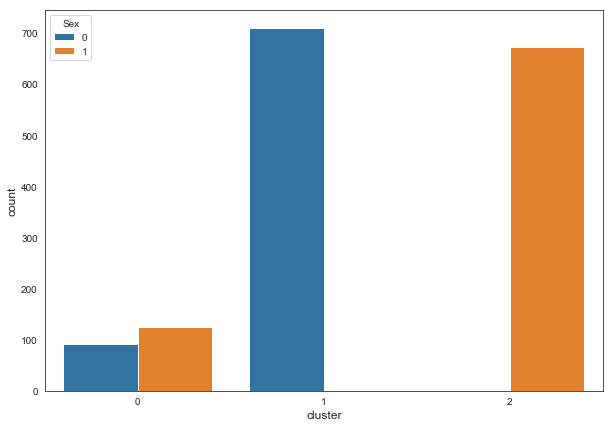

In [367]:
sns.set_style('white')
plt.figure(figsize=(10,7))
plt.xlabel('Cluster', size=12)
plt.ylabel('Counts', size=12)
sns.countplot(x='cluster',data=final_df,hue='Sex')

# 0 - Male, 1 - Female

# Finding : Second cluster only contains male whereas Third cluster only contains  female patients

# Patterns in MS Disease Type

In [306]:
(final_df.groupby('Cluster_1')['Disease Type'].value_counts(), final_df.groupby('Cluster_2')['Disease Type'].value_counts(),
final_df.groupby('Cluster_3')['Disease Type'].value_counts())

(Cluster_1  Disease Type
 False      SPMS            482
            PPMS            417
            RRMS            354
            Other           131
 True       RRMS             91
            PPMS             86
            SPMS             39
 Name: Disease Type, dtype: int64, Cluster_2  Disease Type
 False      RRMS            316
            SPMS            257
            PPMS            215
            Other           102
 True       PPMS            288
            SPMS            264
            RRMS            129
            Other            29
 Name: Disease Type, dtype: int64, Cluster_3  Disease Type
 False      PPMS            374
            SPMS            303
            RRMS            220
            Other            29
 True       RRMS            225
            SPMS            218
            PPMS            129
            Other           102
 Name: Disease Type, dtype: int64)

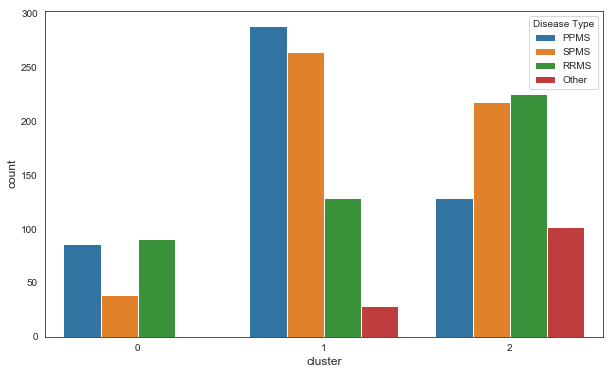

In [317]:
plt.figure(figsize=(10,6))
plt.xlabel('Cluster', size=12)
plt.ylabel('Counts', size=12)
sns.countplot(x='cluster', data=final_df, hue='Disease Type')

# Finding: Second cluster (1 on x axis)  has more number of patients with PPMS and SPMS whereas third cluster (2 on x axis)  has more patients with RRMS and Other (Non PPMS/SPMS/RRMS) disease type 

# Conclusions: We categorized the data into 3 different clusters and based on the analyis, below are the unique features of each cluster groups: 

 # First cluster : Younger patients of Gene isotope type (IgG) of both the genders with higher EDSS(disability level) and high number of B cell subtypes and lymphocytes. Most common disease type is PPMS and RRMS 

# Second Cluster: Older Male patients of gene isotope type (IgA) and most commonly facing PPMS and SPMS disease types

# Third Cluster: Older Female patients of gene isotope types (IgG and IgM) having higher average HV, HJ, LV and LJ region scores in Heavychain and Lightchain V and J alleles, therefore with less antigen exposure. Most commonly facing RRMS and other disease tpye (like Sjoren's)